In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import scipy.stats as stats
df_H = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')

In [4]:
df_H.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1894 non-null   int64  
 1   환자ID                    1894 non-null   object 
 2   Large Lymphocyte        1894 non-null   float64
 3   Location of herniation  1894 non-null   int64  
 4   ODI                     462 non-null    float64
 5   가족력                     1843 non-null   float64
 6   간질성폐질환                  1894 non-null   int64  
 7   고혈압여부                   1894 non-null   int64  
 8   과거수술횟수                  1894 non-null   int64  
 9   당뇨여부                    1894 non-null   int64  
 10  말초동맥질환여부                1894 non-null   int64  
 11  빈혈여부                    1894 non-null   int64  
 12  성별                      1894 non-null   int64  
 13  스테로이드치료                 1894 non-null   int64  
 14  신부전여부                   1894 non-null   

In [7]:
df_H_stat = df_H[['환자ID', '신장', '체중']]
df_H_stat[:2]

,환자ID,신장,체중
0,1PT,163,60.3
1,2PT,171,71.7


In [8]:
df_H_stat.isnull().sum()

환자ID    0
신장      0
체중      0
dtype: int64

In [9]:
df_H_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   환자ID    1894 non-null   object 
 1   신장      1894 non-null   int64  
 2   체중      1894 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 44.5+ KB


#### BMI를 환산할 Function

In [10]:
def BMI(weight, height):
    a = height / 100
    return weight / (a * a)

In [11]:
df_H_stat['BMI'] = BMI(df_H_stat['체중'], df_H_stat['신장'])

C:\Users\04-17\AppData\Local\Temp\ipykernel_26268\3759786357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_H_stat['BMI'] = BMI(df_H_stat['체중'], df_H_stat['신장'])


In [12]:
df_H_stat['BMI']

0       22.695623
1       24.520365
2       24.334049
3       24.507861
4       24.097465
          ...    
1889    25.964542
1890    23.936062
1891    25.099502
1892    24.577867
1893    17.361111
Name: BMI, Length: 1894, dtype: float64

#### BMI 등급을 환산할 Function

In [19]:
def BMI_Grade(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi >= 18.5 and bmi < 25:
        return 'Healthy_Weight'
    elif bmi >= 25 and bmi < 30:
        return 'Overweight'
    else: return 'Obesity'

In [20]:
df_H_stat['BMI Grade'] = df_H_stat['BMI'].apply(BMI_Grade)

C:\Users\04-17\AppData\Local\Temp\ipykernel_26268\1931985480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_H_stat['BMI Grade'] = df_H_stat['BMI'].apply(BMI_Grade)


#### BMI와 BMI등급 표에 추가

In [21]:
df_H_stat['BMI Grade']

0       Healthy_Weight
1       Healthy_Weight
2       Healthy_Weight
3       Healthy_Weight
4       Healthy_Weight
             ...      
1889        Overweight
1890    Healthy_Weight
1891        Overweight
1892    Healthy_Weight
1893       Underweight
Name: BMI Grade, Length: 1894, dtype: object

In [31]:
df_H_table = df_H_stat['BMI Grade'].value_counts()
df_H_table

Healthy_Weight    1390
Overweight         403
Obesity             63
Underweight         38
Name: BMI Grade, dtype: int64

In [52]:
df_stat_table = df_H_stat[['환자ID', 'BMI Grade']]
df_stat_table[:5]

,환자ID,BMI Grade
0,1PT,Healthy_Weight
1,2PT,Healthy_Weight
2,3PT,Healthy_Weight
3,4PT,Healthy_Weight
4,5PT,Healthy_Weight


#### BMI등급에 따른 환자 수 시각화

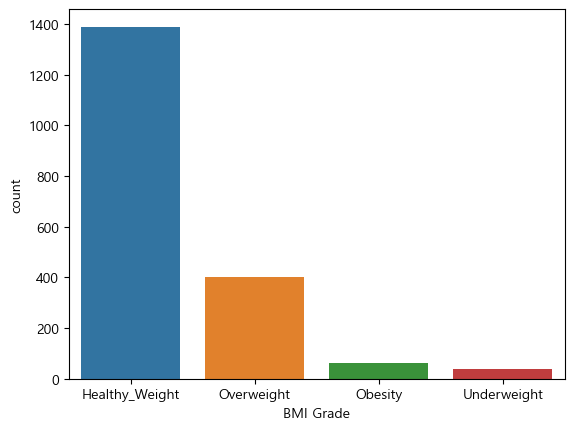

In [69]:
# df_chart = sns.barplot(data=df_stat_table, x='BMI Grade', y='환자ID')
df_chart = sns.countplot(x=df_H_stat['BMI Grade'])

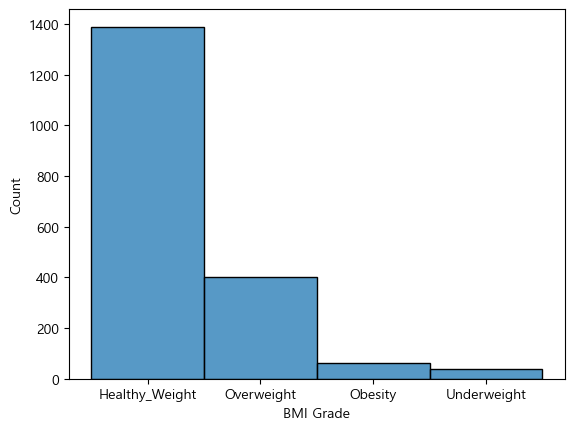

In [85]:
# histplot으로 작성
df_chart = sns.histplot(data=df_H_stat, x='BMI Grade')

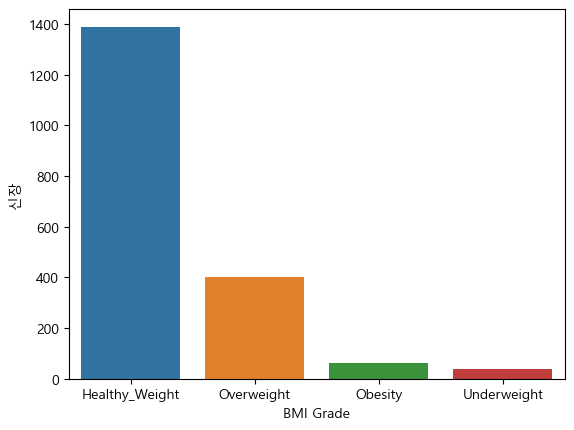

In [91]:
# barplot으로 작성
df_chart = sns.barplot(data=df_H_stat, x='BMI Grade', y='신장', estimator=len)

### 결론
- 환자의 키를 100으로 나눈 값의 제곱으로 몸무게를 나누어 BMI를 환산해 체중의 건강상태를 확인하였다.
- 대부분의 환자는 Healthy Weight그룹에 속하였다.
- 가장 적은 수의 환자가 속한 그룹은 Underweight이었다.
- 다수의 환자들이 건강한 체중을 유지하고 있음을 통계를 통해 확인하였다.